In [1]:
# 添加项目 PYTHONPATH
import sys
import os
current_dir = os.path.abspath("")

project_root = os.path.abspath(os.path.join(current_dir,"../"))

sys.path.append(project_root)

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from utils.satellites_data.general_functions import (
    get_simulated_satellite_radiance,
)
from utils import generate_radiance_lut_and_uas as glut

import os

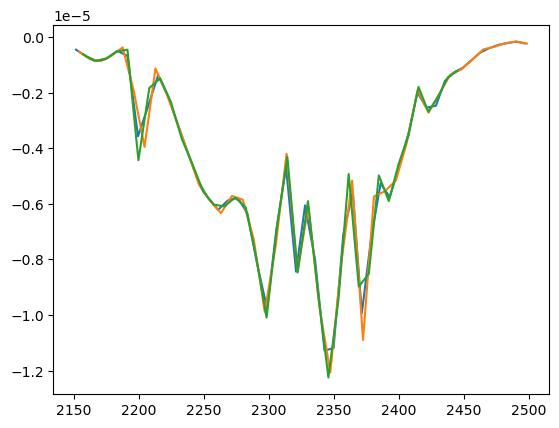

In [5]:
# # 基于modtran模拟结果，基于甲烷浓度增强范围，为特定卫星 生成单位吸收谱
# def generate_satellite_uas_1(
#     satellite: str,
#     enhancement_range: np.ndarray,
#     lower_wavelength: float,
#     upper_wavelength: float,
# ):
#     """
#     generate the unit absorption spectrum for a given satellite

#     Args:
#         satellite (str): the satellite name
#         enhancement_range (np.ndarray): the enhancement range of methane
#         lower_wavelength (float): the lower bound of the wavelength range
#         upper_wavelength (float): the upper bound of the wavelength range
#     Returns:
#         np.ndarray, np.ndarray: return the bands and slopelist
#     """
#     satellite_channels_path = f"data/satellite_channels/{satellite}_channels.npz"
#     if os.path.exists(satellite_channels_path):
#         channels_path = satellite_channels_path
#     else:
#         print("The channels path does not exist.")

#     total_radiance = []
#     slopelist = []

#     filepath = (
#             "C:\\PcModWin5\\Bin\\batch\\AHSI_methane_0_ppmm_tape7.txt"
#         )
#     bands, base_radiance = get_simulated_satellite_radiance(
#         filepath, channels_path, lower_wavelength, upper_wavelength
#     )
    
    
#     for enhancement in enhancement_range:
#         # filepath = f"C:\\PcModWin5\\Bin\\batch\\{int(enhancement)}_90_0_tape7.txt"
#         filepath = (
#             f"C:\\PcModWin5\\Bin\\batch\\AHSI_methane_{int(enhancement)}_ppmm_tape7.txt"
#         )
#         # bands, convoluved_radiance = get_simulated_satellite_radiance(
#         #     filepath, channels_path, lower_wavelength, upper_wavelength
#         # )
#         bands, convoluved_radiance = read_simulated_radiance(filepath)
#         total_radiance.append(convoluved_radiance)
#     total_radiance = np.transpose(np.log(np.array(total_radiance)))

#     # 拟合斜率作为单位吸收谱的结果
#     for data in total_radiance:
#         slope, _ = np.polyfit(enhancement_range, data, 1)
#         slopelist.append(min(slope, 0))

#     return bands, slopelist

# wvls,uas = generate_satellite_uas_1("PRISMA",np.arange(500,20000,500),2150,2500)
# indices = np.where(wvls>2100)
# plt.figure()
# # plt.plot(np.array(wvls)[indices],np.array(uas)[indices])
# channel_path = "data/satellite_channels/PRISMA_channels.npz"
# channels = np.load(channel_path)
# central_wavelengths = channels["central_wvls"]
# fwhms = channels["fwhms"]
# uas = gf.convolute_into_higher_spectral_res(central_wavelengths,fwhms,wvls,uas)
# indices = np.where(central_wavelengths>2100)

# plt.plot(central_wavelengths[indices],np.array(uas)[indices])


def generate_satellite_uas(
    satellite: str,
    enhancement_range: np.ndarray,
    lower_wavelength: float,
    upper_wavelength: float,
):
    """
    generate the unit absorption spectrum for a given satellite

    Args:
        satellite (str): the satellite name
        enhancement_range (np.ndarray): the enhancement range of methane
        lower_wavelength (float): the lower bound of the wavelength range
        upper_wavelength (float): the upper bound of the wavelength range
    Returns:
        np.ndarray, np.ndarray: return the bands and slopelist
    """
    satellite_channels_path = f"C:\\Users\\RS\\VSCode\\matchedfiltermethod\\data\\satellite_channels\\{satellite}_channels.npz"
    if os.path.exists(satellite_channels_path):
        channels_path = satellite_channels_path
    else:
        print("The channels path does not exist.")

    total_radiance = []
    slopelist = []

    filepath = (
            "C:\\PcModWin5\\Bin\\batch\\AHSI_methane_0_ppmm_tape7.txt"
        )
    bands, base_radiance = get_simulated_satellite_radiance(
        filepath, channels_path, lower_wavelength, upper_wavelength
    )
    
    
    for enhancement in enhancement_range:
        # filepath = f"C:\\PcModWin5\\Bin\\batch\\{int(enhancement)}_90_0_tape7.txt"
        filepath = (
            f"C:\\PcModWin5\\Bin\\batch\\AHSI_methane_{int(enhancement)}_ppmm_tape7.txt"
        )
        bands, convoluved_radiance = get_simulated_satellite_radiance(
            filepath, channels_path, lower_wavelength, upper_wavelength
        )
        # bands, convoluved_radiance = read_simulated_radiance(filepath)
        total_radiance.append(convoluved_radiance)
    total_radiance = np.transpose(np.log(np.array(total_radiance)))

    # 拟合斜率作为单位吸收谱的结果
    for data in total_radiance:
        slope, _ = np.polyfit(enhancement_range, data, 1)
        slopelist.append(min(slope, 0))

    return bands, slopelist

# wvls,uas = generate_satellite_uas("PRISMA",np.arange(500,20000,500),2150,2500)

wvls,uas = glut.generate_satellite_uas_for_specific_range_from_lut("PRISMA",0,50000,2150,2500,25,0)

plt.plot(np.array(wvls),np.array(uas))

wvls,uas = glut.generate_satellite_uas_for_specific_range_from_lut("AHSI",0,50000,2150,2500,25,0)

plt.plot(np.array(wvls),np.array(uas))


wvls,uas = glut.generate_satellite_uas_for_specific_range_from_lut("EnMAP",0,50000,2150,2500,25,0)

plt.plot(np.array(wvls),np.array(uas))


plt.show()


# channels_path = "C:\\Users\\RS\\VSCode\\matchedfiltermethod\\src\\data\\satellite_channels\\AHSI_channels.npz"
# filepath1 = "C:\\PcModWin5\\Bin\\batch\\50000_60_0_tape7.txt"
# # filepath = "C:\\PcModWin5\\Bin\\batch\\0_0_0_tape7.txt"
# filepath = "C:\\PcModWin5\\Bin\\batch\\AHSI_methane_20000_ppmm_tape7.txt"
# fig, ax = plt.subplots(1, 2)
# bands, convoluved_radiance = get_simulated_satellite_radiance(
#     filepath, channels_path, 2100, 2500
# )
# ax[0].plot(bands, convoluved_radiance)
# bands, convoluved_radiance = get_simulated_satellite_radiance(
#     filepath1, channels_path, 2100, 2500
# )
# ax[1].plot(bands, convoluved_radiance)

# bands, radiance = read_simulated_radiance(filepath1)
# condition = np.logical_and(bands >= 2100, bands <= 2500)
# ax[0].plot(bands[condition], radiance[condition])
# print(radiance.max())
# bands, radiance = read_simulated_radiance(filepath)
# condition = np.logical_and(bands >= 2100, bands <= 2500)
# ax[1].plot(bands[condition], radiance[condition])
# print(radiance.max())
# plt.show()

In [3]:
# 基于modtran模拟结果，基于甲烷浓度增强范围，为特定卫星 生成单位吸收谱
def generate_satellite_uas(
    satellite: str,
    enhancement_range: np.ndarray,
    lower_wavelength: float,
    upper_wavelength: float,
):
    """
    generate the unit absorption spectrum for a given satellite

    Args:
        satellite (str): the satellite name
        enhancement_range (np.ndarray): the enhancement range of methane
        lower_wavelength (float): the lower bound of the wavelength range
        upper_wavelength (float): the upper bound of the wavelength range
    Returns:
        np.ndarray, np.ndarray: return the bands and slopelist
    """
    satellite_channels_path = f"C:\\Users\\RS\\VSCode\\matchedfiltermethod\\data\\satellite_channels\\{satellite}_channels.npz"
    if os.path.exists(satellite_channels_path):
        channels_path = satellite_channels_path
    else:
        print("The channels path does not exist.")

    total_radiance = []
    slopelist = []

    filepath = (
            "C:\\PcModWin5\\Bin\\batch\\AHSI_methane_0_ppmm_tape7.txt"
        )
    bands, base_radiance = get_simulated_satellite_radiance(
        filepath, channels_path, lower_wavelength, upper_wavelength
    )
    
    
    for enhancement in enhancement_range:
        # filepath = f"C:\\PcModWin5\\Bin\\batch\\{int(enhancement)}_90_0_tape7.txt"
        filepath = (
            f"C:\\PcModWin5\\Bin\\batch\\AHSI_methane_{int(enhancement)}_ppmm_tape7.txt"
        )
        bands, convoluved_radiance = get_simulated_satellite_radiance(
            filepath, channels_path, lower_wavelength, upper_wavelength
        )
        # bands, convoluved_radiance = read_simulated_radiance(filepath)
        total_radiance.append(convoluved_radiance)
    total_radiance = np.transpose(np.log(np.array(total_radiance)))

    # 拟合斜率作为单位吸收谱的结果
    for data in total_radiance:
        slope, _ = np.polyfit(enhancement_range, data, 1)
        slopelist.append(min(slope, 0))

    return bands, slopelist

wvls,uas = generate_satellite_uas("AHSI",np.arange(500,20000,500),2150,2500)
plt.figure()
plt.plot(np.array(wvls),np.array(uas))
plt.show()

The channels path does not exist.


UnboundLocalError: cannot access local variable 'channels_path' where it is not associated with a value